# Relative feature tightness using part 5 for test data

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import numpy as np

from ast import literal_eval
import re
import sys
sys.path.insert(0,"./../fip3")
from fip import profiles

## Dataset prep

### Making feature pointwise mutual information profiles

In [7]:
profile0 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp0_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile1 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp1_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile2 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp2_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile3 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp3_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile4 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp4_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile6 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp6_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile7 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp7_38629.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38629)
profile8 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp8_38629.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38629)
profile9 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp9_38629.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38629)

In [8]:
profile0.add_another_cooccurrence_profile(profile1)
profile0.add_another_cooccurrence_profile(profile2)
profile0.add_another_cooccurrence_profile(profile3)
profile0.add_another_cooccurrence_profile(profile4)
profile0.add_another_cooccurrence_profile(profile6)
profile0.add_another_cooccurrence_profile(profile7)
profile0.add_another_cooccurrence_profile(profile8)
profile0.add_another_cooccurrence_profile(profile9)

In [9]:
probability_profile = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(profile0)

In [10]:
pmi_profile = profiles.PointwiseMutualInformationProfile.from_cooccurrence_probability_profile(probability_profile)

In [11]:
reference_profile0 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp0_37902.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37902)
reference_profile1 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp1_37902.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37902)
reference_profile2 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp2_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile3 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp3_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile4 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp4_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile6 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp6_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile7 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp7_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile8 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp8_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile9 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp9_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)

In [12]:
reference_profile0.add_another_cooccurrence_profile(reference_profile1)
reference_profile0.add_another_cooccurrence_profile(reference_profile2)
reference_profile0.add_another_cooccurrence_profile(reference_profile3)
reference_profile0.add_another_cooccurrence_profile(reference_profile4)
reference_profile0.add_another_cooccurrence_profile(reference_profile6)
reference_profile0.add_another_cooccurrence_profile(reference_profile7)
reference_profile0.add_another_cooccurrence_profile(reference_profile8)
reference_profile0.add_another_cooccurrence_profile(reference_profile9)

In [13]:
reference_probability_profile = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(reference_profile0)

In [14]:
reference_pmi_profile = profiles.PointwiseMutualInformationProfile.from_cooccurrence_probability_profile(reference_probability_profile)

### Making feature pointwise KL divergence profile between COCONUT and ZINC

In [15]:
difference_pkld_profile = profiles.PointwiseKLDivergenceProfile.from_cooccurrence_probability_profiles(
    probability_profile, reference_probability_profile)
difference_pkld_profile.df

value
feature1 feature2          
0        0         2.054174
         1         2.862512
         10        5.101818
         100       5.431971
         1000      3.398800
...                     ...
928      972      -0.027469
939      986      -1.027469
959      995      -0.027469
968      990      -3.834824
969      995      -0.027469

[2097996 rows x 1 columns]

### Sampling structures from COCONUT and ZINC datasets

In [16]:
coconut_samples = pd.read_csv('../data/CP1/COCONUT/COCOrandom.csv', delimiter = ' ')
coconut_samples = coconut_samples.drop(['Coconut_id'], axis=1)
coconut_samples['Name'] = 'COCONUT'

In [17]:
df_split_coco = np.array_split(coconut_samples, 10)

In [18]:
df_split_coco[5]

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset
193150,CCCCCC=CCC=CCC=CCCCCCCC(=O)OCC(CO)OC(=O)CCCCCC...,672.569276,12.62110,RYBURRAWDXPPKP-UHFFFAOYSA-N,RYBURRAWDXPPKP,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 69, 80, 118, 125, 147, 222, 294, 401, 482,..."
193151,CN(C)CCc1c2c(c3nccc4c3c1Nc1ccccc1-4)NC(=O)CS2,376.135782,4.10710,GNFZXVRWYHFYNY-UHFFFAOYSA-N,GNFZXVRWYHFYNY,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 94, 142, 157, 254, 297, 314, 326, 331, 34..."
193152,Cc1cccc(C)c1N=Cc1c(O)c(O)c(C(C)C)c2cc(C)c(-c3c...,724.351237,11.49212,NPMJHDBMPKEOHP-UHFFFAOYSA-N,NPMJHDBMPKEOHP,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 58, 202, 217, 224, 261, 283, 350, 456, 500..."
193153,C[NH2+]C(C(=O)[O-])C(=O)OCC1OC(Oc2ccc3c(=O)c(-...,617.210840,-2.01590,JURVDXTYAZJHAK-UHFFFAOYSA-N,JURVDXTYAZJHAK,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 49, 58, 80, 147, 222, 227, 283, 304, 314, ..."
193154,CC1(C)CCC2(C(=O)O)CCC3(C)C(=CCC4C5(C)CCC(OC6OC...,604.397519,4.66930,OZOGRWOXFIBCFE-UHFFFAOYSA-N,OZOGRWOXFIBCFE,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 184, 222, 249, 267, 389, 409, 418, 478, 4..."
...,...,...,...,...,...,...,...,...
231775,CCCC(=O)OCC1OC(OC(C)(C)CC=CC(C)=CC=CC(C)=CC=CC...,782.512155,10.69390,WRRFRVMEHWIGOT-UHFFFAOYSA-N,WRRFRVMEHWIGOT,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[12, 31, 55, 58, 61, 73, 80, 81, 99, 114, 147,..."
231776,NC(=O)Nc1ccccc1N,151.074562,0.75940,BTNSLPQCLXHERR-UHFFFAOYSA-N,BTNSLPQCLXHERR,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[140, 494, 650, 807, 910, 944, 1088, 1152, 117..."
231777,COc1ccc(OC)c(NC(=O)CCc2c(C)c3ccc(O)cc3oc2=O)c1,383.136887,3.39552,OQAWRSLTVFVTOP-UHFFFAOYSA-N,OQAWRSLTVFVTOP,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[41, 80, 94, 188, 249, 252, 305, 314, 322, 381..."
231778,CCCCCCCCCCCCCCCCCCCC(=O)CCCCCCCCC,422.448766,10.73790,ZPVRGRJHOPAZOE-UHFFFAOYSA-N,ZPVRGRJHOPAZOE,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 229, 294, 591, 650, 794, 807, 1057, 1143,..."


In [19]:
zinc_samples = pd.read_csv('../data/CP1/ZINC/ZINCrandom.csv', delimiter = ' ')
zinc_samples = zinc_samples.drop(['Zinc_id'], axis=1)

In [20]:
df_split_zinc = np.array_split(zinc_samples, 10)
df_split_zinc[5]

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset
189507,CCCOc1c(Br)cc(C(=O)Nc2ccc(OC)cc2)cc1OCC,407.073220,4.89750,DFZKIXXYWBCZSK-UHFFFAOYSA-N,DFZKIXXYWBCZSK,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[13, 76, 80, 191, 237, 294, 322, 333, 425, 428..."
189508,Cn1cc(C(=O)O)c(S(=O)(=O)N2CCc3ccccc3C2)n1,321.078327,0.86530,YWBOZGAVEXKSDM-UHFFFAOYSA-N,YWBOZGAVEXKSDM,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 196, 242, 350, 378, 389, 456, 464, 585, 6..."
189509,CCN1CCN(S(=O)(=O)c2ccc(C(=O)Nc3sc4c(c3C(N)=O)C...,505.181746,1.80350,NCVWTJBDVVPXOS-UHFFFAOYSA-N,NCVWTJBDVVPXOS,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 34, 42, 50, 74, 80, 83, 140, 162, 216, 268..."
189510,CN(C(=O)Cn1nccn1)[C@H]1CN(c2cnc(C#N)cn2)C[C@@H]1O,328.139622,-1.35212,OTNPKMJMEBWGPH-RYUDHWBXSA-N,OTNPKMJMEBWGPH,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[43, 80, 123, 217, 330, 378, 407, 435, 459, 52..."
189511,CC(C)(C)CCN1CCC(C)(CNC(=O)c2cc(C#N)c[nH]2)CC1,330.241962,3.15448,SODUDUFGPXJZHN-UHFFFAOYSA-N,SODUDUFGPXJZHN,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[27, 41, 60, 80, 102, 114, 143, 197, 305, 355,..."
...,...,...,...,...,...,...,...,...
227403,COc1cccc2c1OCCCn1cc(nn1)CCN(C(=O)CCCn1cccn1)CC...,628.312166,2.27470,OWIDENYCBUTPMT-NDEPHWFRSA-N,OWIDENYCBUTPMT,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[25, 43, 75, 77, 80, 86, 110, 115, 210, 249, 2..."
227404,COCC(=O)N[C@@H]1[C@@H](O)CO[C@@H]1Cn1cc(C(C)(C...,312.179755,-0.53350,UWDZQOOQTPFSND-OPQQBVKSSA-N,UWDZQOOQTPFSND,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[41, 80, 114, 235, 299, 319, 378, 387, 392, 46..."
227405,Cc1ccc(OCc2nnc(SCC(=O)Nc3ncc(Cc4ccc(F)cc4)s3)n...,545.135545,6.07192,YSKJAHOPVMJZBN-UHFFFAOYSA-N,YSKJAHOPVMJZBN,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[41, 58, 80, 90, 102, 116, 162, 235, 310, 318,..."
227406,NN[C@H](c1ccccc1)c1cccc(Cl)c1,232.076726,2.89270,NMSRYJPOVUGNSC-CYBMUJFWSA-N,NMSRYJPOVUGNSC,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 165, 216, 222, 389, 483, 484, 561, 592, 87..."


In [21]:
joint_samples = pd.concat((df_split_coco[5], df_split_zinc[5]), ignore_index=True)

In [22]:
for x in joint_samples.index:
    a = joint_samples['Bitset'][x]
    a = a.split(", ")
    a = re.sub('\[', '', str(a))
    a = re.sub('\]', '', str(a))
    tup = literal_eval(a)
    joint_samples['Bitset'][x] = tup

/var/tmp/pbs.43231.lich-compute.vscht.cz/ipykernel_34704/3101749155.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_samples['Bitset'][x] = tup


## Relative feature tightness against a PMI interrelation profile

In [23]:
joint_samples['RFT'] = joint_samples['Bitset'].apply(
    lambda x: difference_pkld_profile.relative_feature_divergence(x))

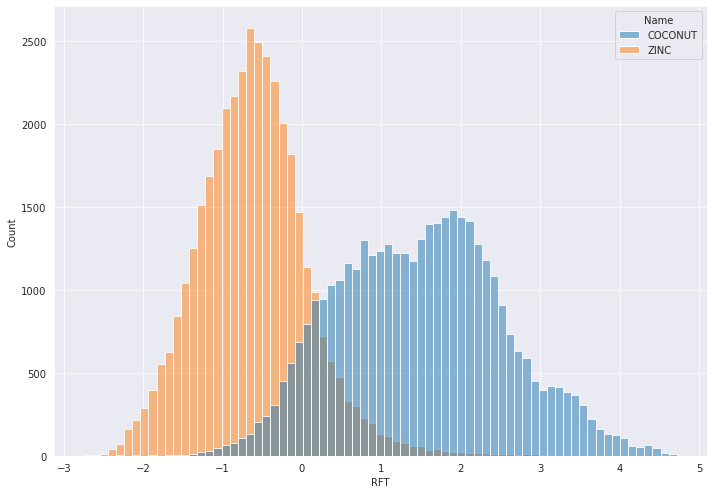

In [24]:
a4_dims = (11.7, 8.27)
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(joint_samples, x='RFT', hue='Name')
plt.savefig(f"../images//joint_samples_RFT5.svg", format="svg")

According to the histogram, there is a visible split between Relative feature tightness distribution against the pointwise KL divergence profile between COCONUT and ZINC datasets, based on their radius 2 fragments. Larger fragments might diverge even further.